In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('user_actions.csv', sep=',', parse_dates=["createdDateTime"])
df = df.sort_values(['actionId', 'createdDateTime'])
df['type'] = df['message'].str.split(' ').str.get(0)
df['action'] = df['message'].str.split(' ').str.get(1)
df['treatment'] = [1] * len(df)
df.index = range(len(df.index))

In [5]:
list_of_operation = {'IMPORT': 0, 'UPDATE': 0, 'APPROVE': 0, 'DELETE': 0, 'SEARCH': 0, 'CREATE': 0}
list_of_input_data = {'IMPORT': 0, 'UPDATE': 0, 'APPROVE': 0, 'DELETE': 0, 'CREATE': 0}
list_of_s_f_w = {'SUCCESS': 0, 'FAILED': 0, "WARNING": 0}
search_operation, time, input_data, actionId, createdDateTime = [], [], [], [], []

In [6]:
for i in range(len(df) - 1):
    if (df['actionId'][i] == df['actionId'][i + 1] and df['createdDateTime'][i] < df['createdDateTime'][i + 1] 
    and df['type'][i] == "[START]" and df['type'][i + 1] == "[END]" and df['action'][i] == df['action'][i + 1]
    and df['currentUser'][i] == df['currentUser'][i + 1]):
        df.iloc[i, 6] = 0
        df.iloc[i + 1, 6] = 0
        list_of_operation[df['action'][i][1:-2]] += 1
        actionId.append(df['actionId'][i])
        createdDateTime.append(df['createdDateTime'][i])
        if df['action'][i] != "[SEARCH]:":
            list_of_s_f_w['SUCCESS'] += int(df['message'][i+1].split(' ')[2][13:-1])
            list_of_s_f_w['FAILED'] += int(df['message'][i+1].split(' ')[3][11:-1])
            list_of_s_f_w['WARNING'] += int(df['message'][i+1].split(' ')[4][12:-1])
            list_of_input_data[df['action'][i][1:-2]] += int(df['message'][i].split(' ')[2][13:-1])
            time.append(int((df['createdDateTime'][i + 1] - df['createdDateTime'][i]).total_seconds()))
            input_data.append(int(df['message'][i].split(' ')[2][13:-1]))
        else:
            search_operation.append([df['createdDateTime'][i + 1] - df['createdDateTime'][i], df['actionId'][i]])
df2 = pd.DataFrame({'actionId': actionId, 'createdDateTime': createdDateTime})
df2 = df2.set_index("createdDateTime").groupby(pd.Grouper(freq='W')).count()
print("Data that cannot be processed:" + '\n',df[df.treatment == 1])

Data that cannot be processed:
                                    actionId      currentUser  \
74     00facaaa-b571-4ba1-b9d8-f3e5ad78d94f  gkxqjitrflwmuay   
109    0174104b-ba8e-41eb-a1e1-7defa60ad3b1    ozraghkiejdns   
148    025747c6-16cc-4101-9456-0c3ad8412d84  gqahfdmwbieslok   
159    0282cb45-a71a-445f-82ac-766637f143c8           tpoyqv   
168    029a3fd3-e2d3-4b66-9e64-bd08f5c0ece6          okiuvpr   
...                                     ...              ...   
18890  fe8c6bd0-6e5c-4861-ad89-19f2f5df4de4        xrfmtzkeq   
18901  fea836f9-4d24-41ab-a696-ee06b1ac92f3       lxusdzwncy   
18918  fedf7a72-6504-4a1c-a9be-ccced3850b2c  qtprgebwhyalnfv   
18927  fef88e3a-5e8a-48f8-8380-3daa888666eb        xrfmtzkeq   
18944  ff4bc885-4bb8-4103-a5d8-dc11a3bd9a35  gqahfdmwbieslok   

          createdDateTime                                            message  \
74    2019-05-31 12:41:42  [END] [DELETE]: [num_success=474, num_failed=1...   
109   2019-06-05 16:15:00              

Text(0.5, 1.0, 'Percentage of Operations')

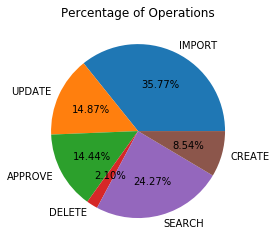

In [7]:
fig, ax = plt.subplots()
ax.pie(list(list_of_operation.values()), labels=list(list_of_operation.keys()), autopct='%1.2f%%')
ax.set_title('Percentage of Operations')

In [15]:
print('The total number of operations by week: ' + '\n', df2[['actionId']])

The total number of operations by week: 
                  actionId
createdDateTime          
2019-01-06            270
2019-01-13            326
2019-01-20            356
2019-01-27            350
2019-02-03            336
2019-02-10            312
2019-02-17            362
2019-02-24            382
2019-03-03            324
2019-03-10            348
2019-03-17            350
2019-03-24            316
2019-03-31            364
2019-04-07            368
2019-04-14            348
2019-04-21            350
2019-04-28            368
2019-05-05            366
2019-05-12            356
2019-05-19            338
2019-05-26            398
2019-06-02            370
2019-06-09            378
2019-06-16            384
2019-06-23            328
2019-06-30            320
2019-07-07            392
2019-07-14            342
2019-07-21            360
2019-07-28            338
2019-08-04            324
2019-08-11            330
2019-08-18            310
2019-08-25            332
2019-09-01            

In [8]:
print('Top 10 most lengthy operations with time taken: ')
for i in sorted(search_operation)[-1:-11:-1]:
    print(i[1], i[0])

Top 10 most lengthy operations with time taken: 
9e63c4d8-2764-465e-ab8a-83446f94240e 0 days 00:16:23
5497fc04-9b2e-4a92-a947-0b45511b3f73 0 days 00:16:20
8e39d016-95b4-4008-82e3-bd42a9ae2c36 0 days 00:16:19
175c84ff-51ba-487b-90f9-89f9cc429b51 0 days 00:16:16
1b8aa553-979c-47ec-80aa-c4622140b3ef 0 days 00:15:55
59b622bb-7e9b-4219-9bc3-1f262af0d1c6 0 days 00:15:54
79c1f320-41e7-4b5a-bf8a-bf266b5e0f53 0 days 00:15:42
6b89eb63-b998-4cc7-8cf4-b7cfea678171 0 days 00:15:36
21248776-e024-431d-ae54-8aab2fc85a53 0 days 00:15:34
21d24895-dcf7-4d77-a95a-8fa4bbe6b21a 0 days 00:15:33


Text(0, 0.5, 'input data (records)')

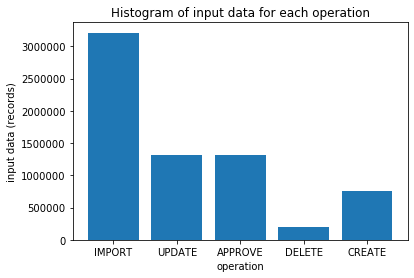

In [24]:
fig, ax = plt.subplots()
ax.bar(list_of_input_data.keys(), list_of_input_data.values())
ax.set_title('Histogram of input data for each operation')
ax.set_xlabel('operation')
ax.set_ylabel('input data (records)')

Text(0.5, 1.0, 'Chart of results')

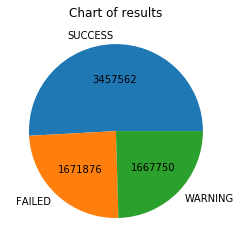

In [37]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_autopct
fig, ax = plt.subplots()
ax.pie(list(list_of_s_f_w.values()), labels=list(list_of_s_f_w.keys()), autopct=make_autopct(list(list_of_s_f_w.values())))
ax.set_title('Chart of results')

Text(0, 0.5, 'time (s)')

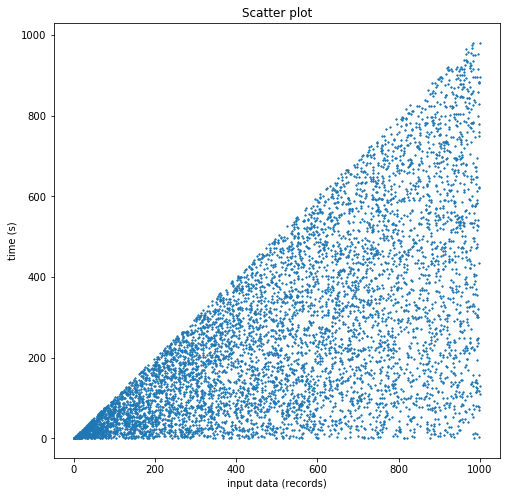

In [23]:
fig, ax = plt.subplots()
ax.scatter(input_data, time, s = 1)
fig.set_figwidth(8)     
fig.set_figheight(8)
ax.set_title('Scatter plot')
ax.set_xlabel('input data (records)')
ax.set_ylabel('time (s)')